# AI 정리 코드

In [53]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [54]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/iris.data",header=None)
#df = pd.read_csv("C:/ai/breast_cancer.csv", index_col=0)
#df = pd.read_excel("C:/ai/Raisin_Dataset.xlsx")
df.columns =["sepal length","sepal width","petal length","petal width","class"]
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'Label')

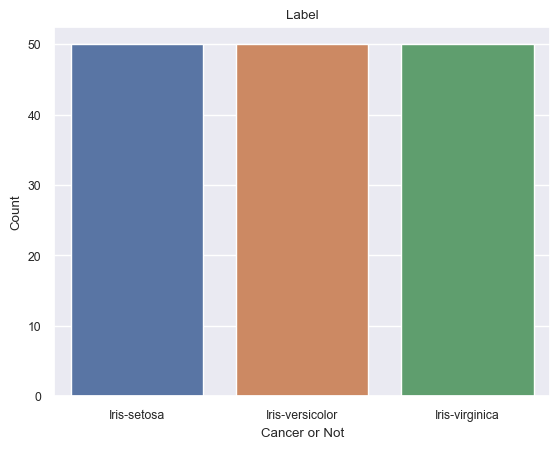

In [55]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class") # x에 대한 데이터 수 확인
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

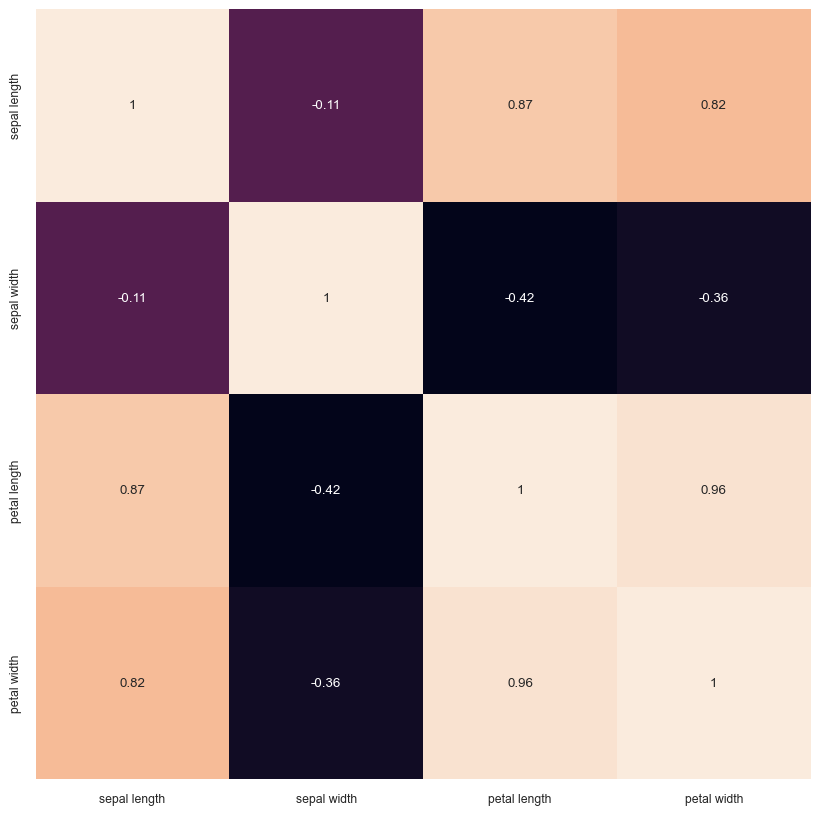

In [56]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [57]:
# 데이터 분류

X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


## < machine learning - calssification >

In [58]:
# classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [60]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [61]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [62]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [63]:
clf_dt = KNeighborsClassifier(n_neighbors=3)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- KNN Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## < machine learning - regression >

In [64]:
# regression

df["class"]=LabelEncoder().fit_transform(df["class"]) ### 회귀 위한 데이터 숫자화


# 데이터 분류

X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    50
1    50
2    50
Name: class, dtype: int64


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.06311996089112888


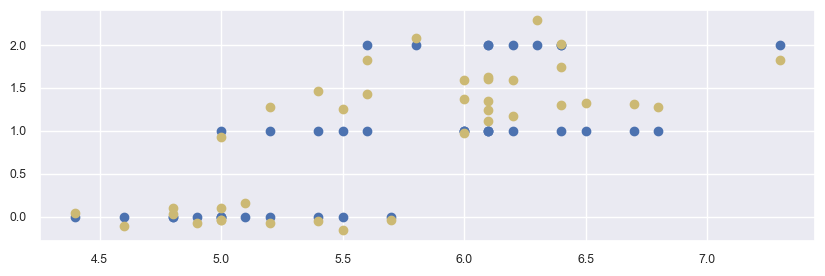

In [66]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ly_preds, c='y', label='y_pred')
plt.show()         

In [67]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.02631578947368421


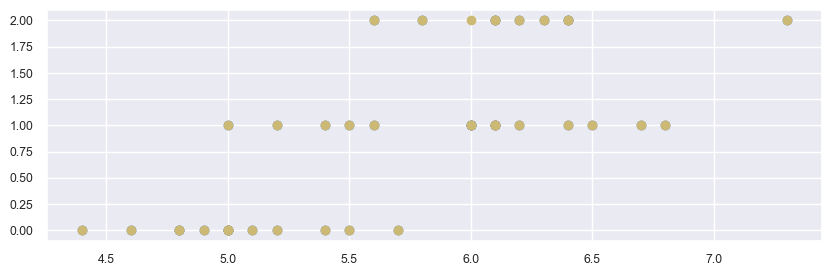

In [68]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], dy_preds, c='y', label='y_pred')
plt.show()         

In [69]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.02428157894736842


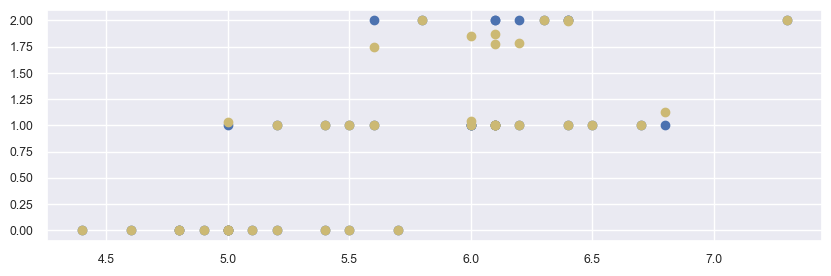

In [70]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ry_preds, c='y', label='y_pred')
plt.show()         

In [71]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

sv_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.02428157894736842


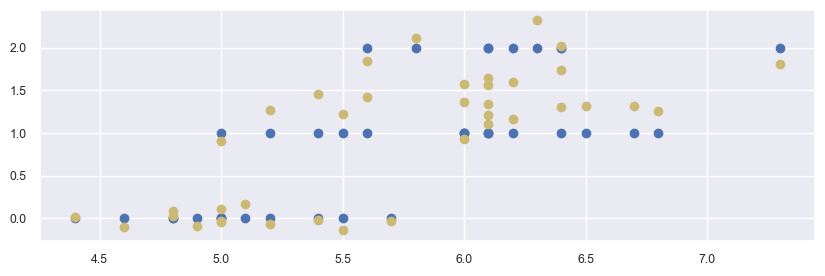

In [72]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,3))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], sv_preds, c='y', label='y_pred')
plt.show()         

## < dedp learning - classification >

In [74]:
df = pd.read_csv("C:/ai/breast_cancer.csv", index_col=0)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [77]:
# 결측치 확인

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [78]:
# 결측치 제거

df = df.dropna()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [170]:
# 딥러닝 데이터셋
for i in df.columns:
    df[i]=LabelEncoder().fit_transform(df[i])
X=df.drop('label',axis=1).values
y = pd.get_dummies(df['label']).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)
print(X)
print(y)

[[370   1 455 ... 483 485 506]
 [426 186 486 ... 401 222 375]
 [406 324 478 ... 468 445 361]
 ...
 [340 458 410 ... 317  40 244]
 [429 467 500 ... 482 472 514]
 [  3 414   1 ...   0 272 121]]
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]


In [171]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax')) # 분류자

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=15, batch_size=4,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5799 - loss: 8.1294 - val_accuracy: 0.5789 - val_loss: 0.6829
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.6201 - loss: 0.6659 - val_accuracy: 0.5789 - val_loss: 0.6893
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7075 - loss: 0.6104 - val_accuracy: 0.5789 - val_loss: 0.6785
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.5945 - loss: 0.6776 - val_accuracy: 0.5789 - val_loss: 0.7152
Epoch 5/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6552 - loss: 0.6506 - val_accuracy: 0.5789 - val_loss: 0.6824
Epoch 6/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6430 - loss: 0.6555 - val_accuracy: 0.5789 - val_loss: 0.6818
Epoch 7/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.6359 - loss: 0.6577 - val_accuracy: 0.5789 - val_loss: 0.6795
Epoch 8/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6270 - loss: 0.6625 - va

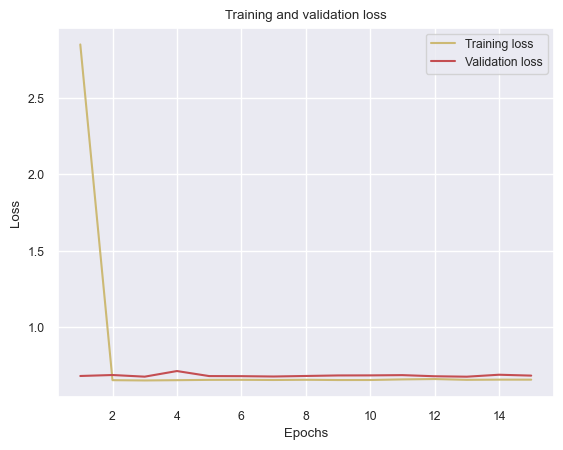

In [173]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [174]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114

[[ 0 48]
 [ 0 66]]


C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1563a\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## < dedp learning - regression >

In [187]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(10, activation="relu")(input_layer)
layer2=Dense(20, activation="relu")(layer1)
layer3=Dense(30, activation="relu")(layer2)
layer4=Dense(40, activation="relu")(layer3)
out_layer=Dense(1)(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "functional_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,191 (4.65 KB)

 Trainable params: 1,191 (4.65 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
n_epoch=15
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=4,validation_data= (X_test,y_test))

Epoch 1/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 594.3370 - mse: 594.3454 - val_loss: 34.1266 - val_mse: 34.6488
Epoch 2/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 14.3425 - mse: 14.3428 - val_loss: 12.5074 - val_mse: 12.7212
Epoch 3/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 4.1920 - mse: 4.1921 - val_loss: 1.3775 - val_mse: 1.3962
Epoch 4/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 1.1216 - mse: 1.1216 - val_loss: 1.6151 - val_mse: 1.6352
Epoch 5/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.5088 - mse: 0.5088 - val_loss: 0.8602 - val_mse: 0.8709
Epoch 6/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 1.3388 - mse: 1.3388 - val_loss: 0.8561 - val_mse: 0.8667
Epoch 7/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.3634 - mse: 0.3634 - val_loss: 0.7751 - val_mse: 0.7843
Epoch 8/15
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 0.3030 - mse: 0.3030 - val_loss: 0.7543 - val_mse: 0.7631
Epoch 9/15
114/114 ━━━━━━━━━━━━━

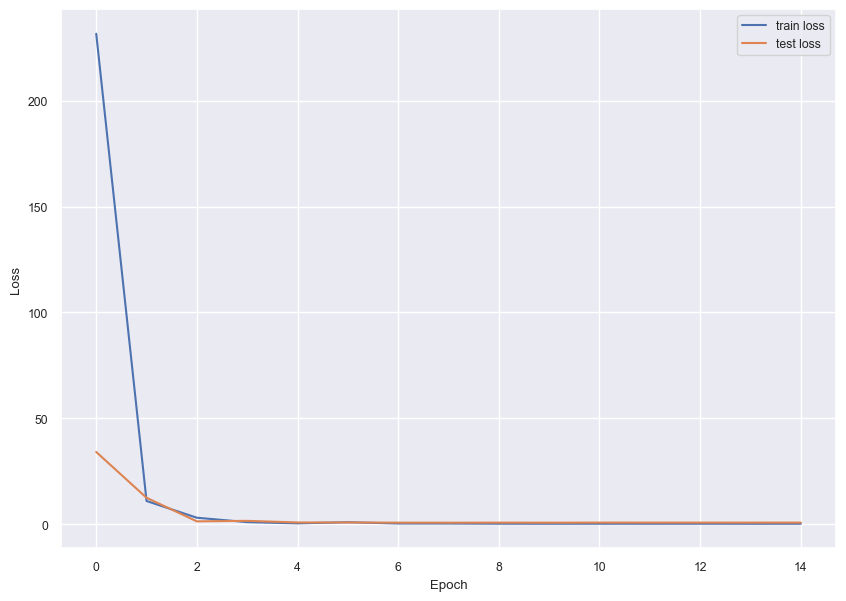

In [189]:
# 딥러닝 결과

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [190]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.1222 - mse: 1.1464
test accuracy:  0.8028150200843811


## < CNN >

In [199]:
from tensorflow.keras import Input, layers, Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Reshape, Conv2D

input_layer=Input(shape=(X_train.shape[1],))
reshaped_input = Reshape((X_train.shape[1], 1, 1))(input_layer)

layer1=layers.Conv2D(16, (1,1),activation="relu")(reshaped_input)

layer2=layers.Conv2D(32, (1,1),activation="relu")(layer1)

layer3=layers.Conv2D(64, (1,1),activation="relu")(layer2)

layer4=layers.Conv2D(128, (1,1),activation="relu")(layer3)

flatten=layers.Flatten()(layer4)
flatten_layer=layers.Dense(32,activation="relu")(flatten)
out_layer=layers.Dense(1)(flatten_layer)

model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "functional_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 30, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 1, 16)      │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 1, 32)      │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 1, 64)      │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 1, 128)     │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │       122,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,953 (523.25 KB)

 Trainable params: 133,953 (523.25 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
n_epoch=10
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=4,validation_data= (X_test,y_test))

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 541.7542 - mse: 541.7601 - val_loss: 1.5209 - val_mse: 1.5339
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5326 - mse: 8.5327 - val_loss: 0.3088 - val_mse: 0.3098
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3570 - mse: 0.3570 - val_loss: 0.3017 - val_mse: 0.3016
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3370 - mse: 0.3370 - val_loss: 0.2861 - val_mse: 0.2866
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3277 - mse: 0.3277 - val_loss: 0.3803 - val_mse: 0.3823
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2999 - mse: 0.2999 - val_loss: 0.2698 - val_mse: 0.2694
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2707 - mse: 0.2707 - val_loss: 0.2594 - val_mse: 0.2594
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2625 - mse: 0.2625 - val_loss: 0.2584 - val_mse: 0.2581
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

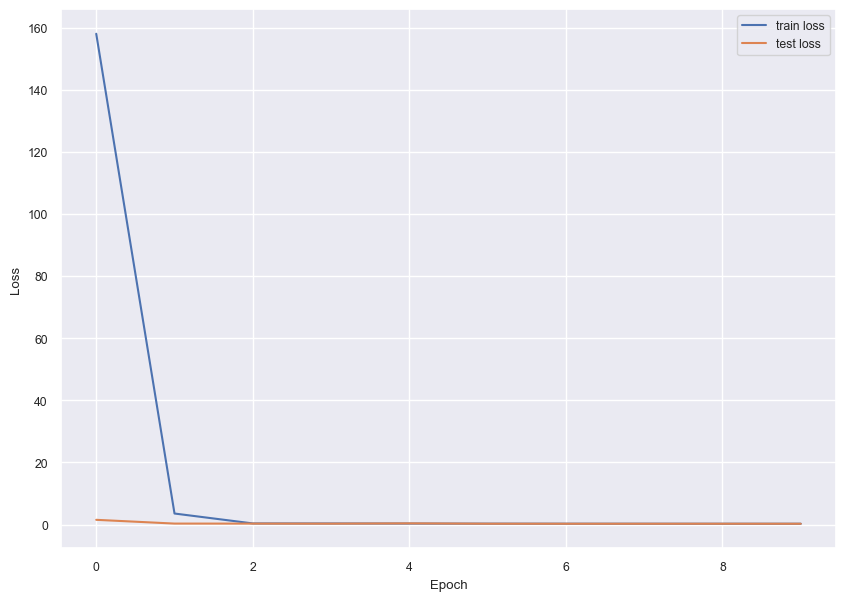

In [202]:
# loss 체크

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [203]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2561 - mse: 0.2561 
test accuracy:  0.2560077905654907


## < RNN >

In [206]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [207]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
print('결측값 여부 :',data.isnull().values.any())
print('v2열의 유니크한 값 :',data['v2'].nunique())
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

결측값 여부 : True
v2열의 유니크한 값 : 5169
총 샘플의 수 : 5169


In [208]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [212]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (4135, 189)


In [215]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8422 - loss: 0.4268 - val_acc: 0.9686 - val_loss: 0.1557
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9620 - loss: 0.1251 - val_acc: 0.9698 - val_loss: 0.1155
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9899 - loss: 0.0525 - val_acc: 0.9782 - val_loss: 0.0786
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9886 - loss: 0.0387 - val_acc: 0.9819 - val_loss: 0.0662


In [216]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9850 - loss: 0.0652

 테스트 정확도: 0.9807


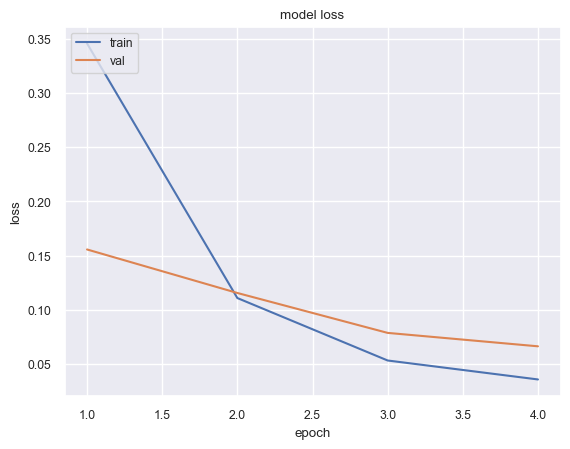

In [217]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## < LSTM >

In [219]:
stock = pd.read_csv("C:/ai/stock.csv")
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [221]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']
stock_AJ = stock[stock['Code']=='A060310']
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_AJ

,Date,Open,High,Low,Close,Volume
0,20210601,2890,2970,2885,2920,166690
2000,20210602,2915,2975,2830,2900,134833
4000,20210603,2900,2925,2875,2900,144470
6000,20210604,2930,3120,2920,2950,934224
8000,20210607,3000,3150,2955,3150,946560
...,...,...,...,...,...,...
978000,20230523,2300,2315,2260,2285,117084
980000,20230524,2280,2300,2255,2280,67101
982000,20230525,2260,2285,2235,2245,91789
984000,20230526,2245,2915,2230,2910,13590249


In [233]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [234]:
# 두 데이터를 리스트 형태로 저장
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]

X = dfx.values.tolist()
y = dfy.values.tolist()
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)

In [235]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

전체 데이터의 크기 : 484 484
훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [256]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=train_X.shape[1:]))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [257]:
n_epoch=70
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
history=model.fit(train_X, train_y, epochs=n_epoch, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2260 - mse: 0.2270
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0978 - mse: 0.0983 
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - mse: 0.0196 
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - mse: 0.0169 
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - mse: 0.0121 
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - mse: 0.0116 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mse: 0.0118 
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - mse: 0.0097 
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mse: 0.0118 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - mse: 0.0109 
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123 - mse: 0.0121 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - mse: 0.0109 
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━

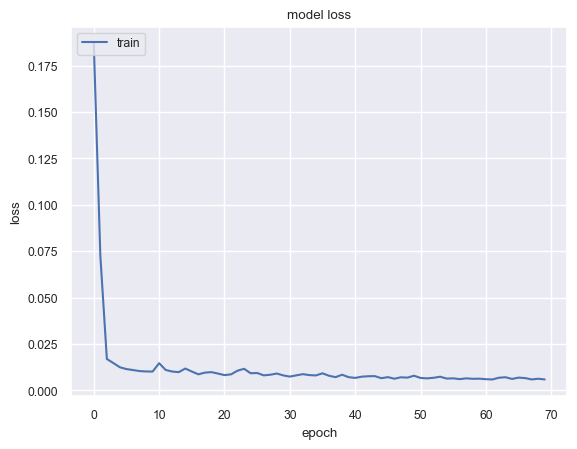

In [258]:
n_epoch=range(n_epoch)
plt.plot(n_epoch, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [259]:
model.evaluate(test_X, test_y)
y_pred = model.predict(test_X)
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - mse: 0.0031  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
MSE: 0.0031925327925553582
